## Problem 1

Consider the optimization problem from problem 3 in assignment 5. 
- (10 pts) Compare ADAM, SGD and accelerated gradient method that uses stochastic gradient estimation on this problem and discuss what method works better and why? 
- (5 pts) Illustrate your conclusion by convergence plots and test different strategies of step size selection. 
- (5 pts) Test different batch sizes and conclude the effect on gradient variance and convergence speed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skldata
from sklearn.datasets import load_breast_cancer
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
data = skldata.load_breast_cancer()
X = data['data']
y = data['target']

data = load_breast_cancer()

In [3]:
# X normalization
X = X / X.max(axis=0)
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
np.random.seed(20)
W = np.random.uniform(0, 1, X.shape[1])
w0=W

In [4]:
def sigmoid(w, x):
  return 1 / (1 + np.exp(-w @ x.T))   

def log_loss(x, s, w):
  return -1 / X.shape[0] * sum(s * np.log(sigmoid(w, x)) \
                           +  (1 - s) * np.log(1 - sigmoid(w, x)))

def analitical_grad(x, s, w):  
  return 1/X.shape[0]*((sigmoid(w, x) - s).T @ x)

In [5]:
n_iter = 10000

In [6]:
print("Data shape", data.data.shape)
print("Features", len(data.feature_names))
print("Targets", len(data.target))

Data shape (569, 30)
Features 30
Targets 569


In [7]:
import random
batch_size = 569
eps = 1e-5


##  ADAM

In [8]:
text_label_iterations = r"Iterations"
text_label_convergence_rate = r"Gradient Convergence Rate"

def analitical_grad_SGD(x, s, w):
    #print('x',x.shape)
    #print('s',s.shape)
    #print('w',w.shape)
    return (1 / x.shape[0])*((sigmoid(w, x) - s).T @ x)


def get_minibatch_grad(x, s, w,  minibatch_size = batch_size):
    batch_indexes = list(range(m))
    random.shuffle(batch_indexes)
    batch_indexes = batch_indexes[:batch_size]
    xB = []
    sB = []
    for i in range(batch_size):
        xB.append(x[batch_indexes[i]])
        sB.append(s[batch_indexes[i]])
    # print('xB', len(xB))
    ans = analitical_grad_SGD(np.array(xB), sB, w)
    return ans


def Adam(w, alpha, eps, max_iterations):
    p1, p2 = 0.9, 0.999 
    r, s = 0, 0
    sigma = 1e-08
    eps = 0.01
    k = batch_size
    iteration = 0
    convergence_history = []
    for iteration in range(max_iterations):
        g = get_minibatch_grad(X, y, w)
        r = p2 * r + (1 - p2) * g * g
        s = p1 * s + (1 - p1) * g
        s_hat = s / (1 - p1 ** k)
        r_hat = r / (1 - p2 ** k)
        h = (eps * s_hat)/(sigma + r_hat ** 0.5)
        w = w - alpha * h
        convergence_history.append(np.linalg.norm(analitical_grad_SGD(X, y, w)))

    return convergence_history



In [9]:
alpha_1 = 1e-3
alpha_2 = 1e-2
alpha_3 = 1e-1
alpha_4 = 1.0

convergence_history1 = Adam(w0, alpha_1, eps, max_iterations=n_iter)
convergence_history2 = Adam(w0, alpha_2, eps, max_iterations=n_iter)
convergence_history3 = Adam(w0, alpha_3, eps, max_iterations=n_iter)
convergence_history4 = Adam(w0, alpha_4, eps, max_iterations=n_iter)

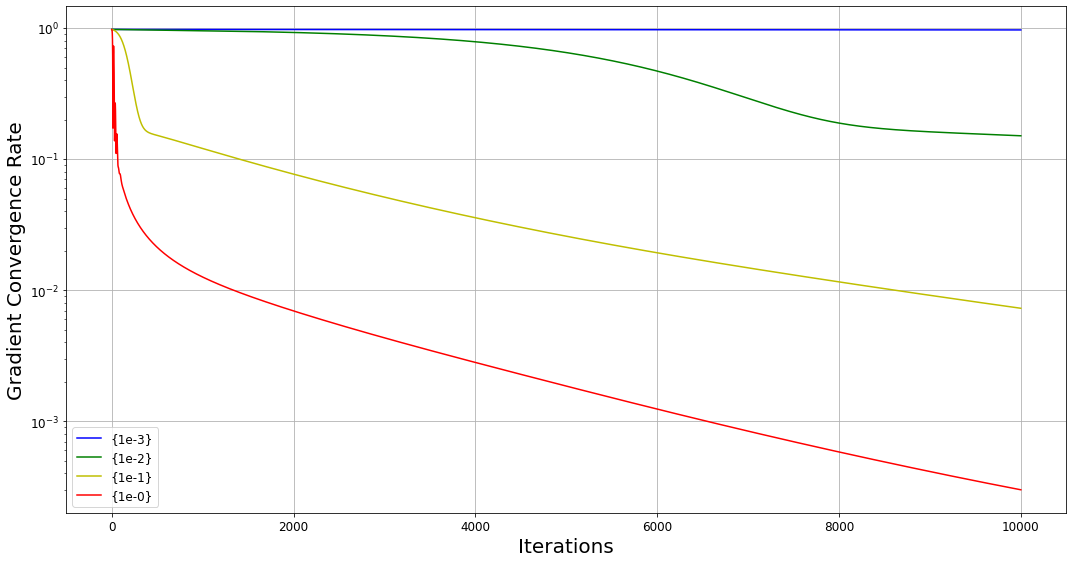

In [10]:
plt.figure(figsize=(15,8))
plt.xlabel(text_label_iterations, fontsize=20)
plt.ylabel(text_label_convergence_rate, fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.tight_layout()

plt.semilogy(convergence_history1, color='b', label='{1e-3}')
plt.semilogy(convergence_history2, color='g', label='{1e-2}')
plt.semilogy(convergence_history3, color='y', label='{1e-1}')
plt.semilogy(convergence_history4, color='r', label='{1e-0}')
plt.legend(loc="best", fontsize=12)


## SGD

$$
x_{k+1} = x_k - \alpha_k \sum_{i \in \mathcal{I}} f'_i(x_k)
$$

In [11]:
data = skldata.load_breast_cancer()
X = data['data']
y = data['target']

data = load_breast_cancer()

In [12]:
# X normalization
X = X / X.max(axis=0)
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
np.random.seed(20)
W = np.random.uniform(0, 1, X.shape[1])

In [13]:
def get_minibatch_grad(x, s, w, batch_size = batch_size):
    batch_indexes = list(range(m))
    random.shuffle(batch_indexes)
    batch_indexes = batch_indexes[:batch_size]
    xB = []
    sB = []
    for i in range(batch_size):
        xB.append(x[batch_indexes[i]])
        sB.append(s[batch_indexes[i]])
    # print('xB', len(xB))
    ans = analitical_grad(np.array(xB), sB, w)
    return ans

In [14]:
def StohasticGradientDescent(W, alpha, eps, max_iterations=n_iter):
    convergence_history = []
    for i in range(max_iterations):
        gradient = get_minibatch_grad(X, y, W)
        W = W - alpha * gradient
        convergence_history.append(np.linalg.norm(analitical_grad(X, y, W)))
    return convergence_history

In [15]:
convergence_history1 = StohasticGradientDescent(w0, alpha_1, eps, max_iterations=n_iter)
convergence_history2 = StohasticGradientDescent(w0, alpha_2, eps, max_iterations=n_iter)
convergence_history3 = StohasticGradientDescent(w0, alpha_3, eps, max_iterations=n_iter)
convergence_history4 = StohasticGradientDescent(w0, alpha_4, eps, max_iterations=n_iter)


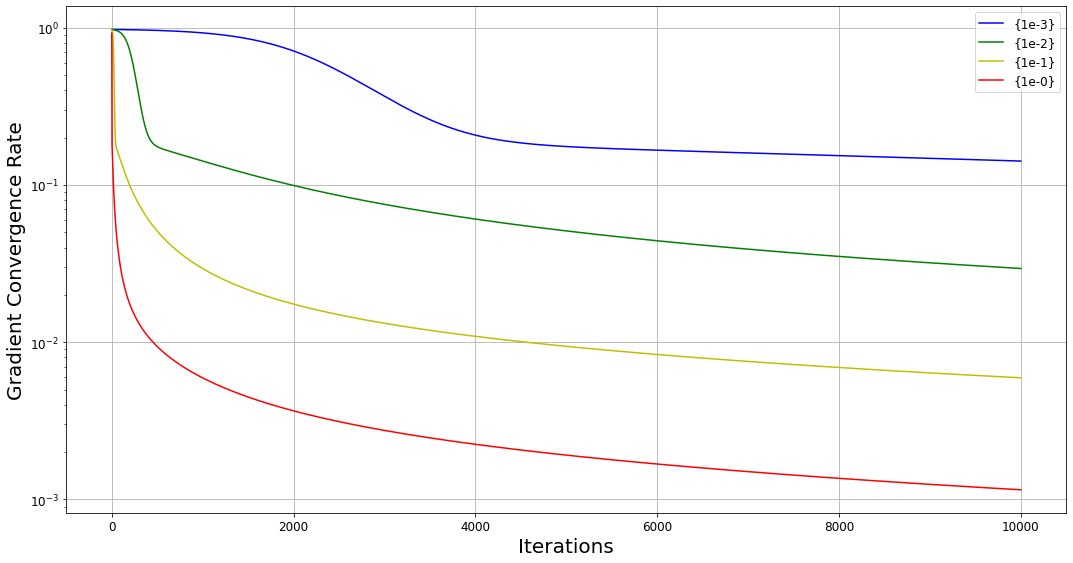

In [16]:
plt.figure(figsize=(15,8))
plt.xlabel(text_label_iterations, fontsize=20)
plt.ylabel(text_label_convergence_rate, fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid(True)
plt.tight_layout()
plt.semilogy(convergence_history1, color='b', label='{1e-3}')
plt.semilogy(convergence_history2, color='g', label='{1e-2}')
plt.semilogy(convergence_history3, color='y', label='{1e-1}')
plt.semilogy(convergence_history4, color='r', label='{1e-0}')
plt.legend(loc="best", fontsize=12)

## Nesterov momentum

In [17]:
def NesterovMomentum(w, alpha, eps, max_iterations=n_iter):
    b = 0.3
    h = 0.9
    iteration = 0
    convergence_history = []
    for iteration in range(max_iterations):
        h = b*h - alpha*get_minibatch_grad(X + alpha * h, y, w)
        w = w + alpha * h
        convergence_history.append(np.linalg.norm(analitical_grad(X, y, w)))
    return convergence_history

In [18]:
convergence_history1 = NesterovMomentum(w0, alpha_1, eps, max_iterations=n_iter)
convergence_history2 = NesterovMomentum(w0, alpha_2, eps, max_iterations=n_iter)
convergence_history3 = NesterovMomentum(w0, alpha_3, eps, max_iterations=n_iter)
convergence_history4 = NesterovMomentum(w0, alpha_4, eps, max_iterations=n_iter)


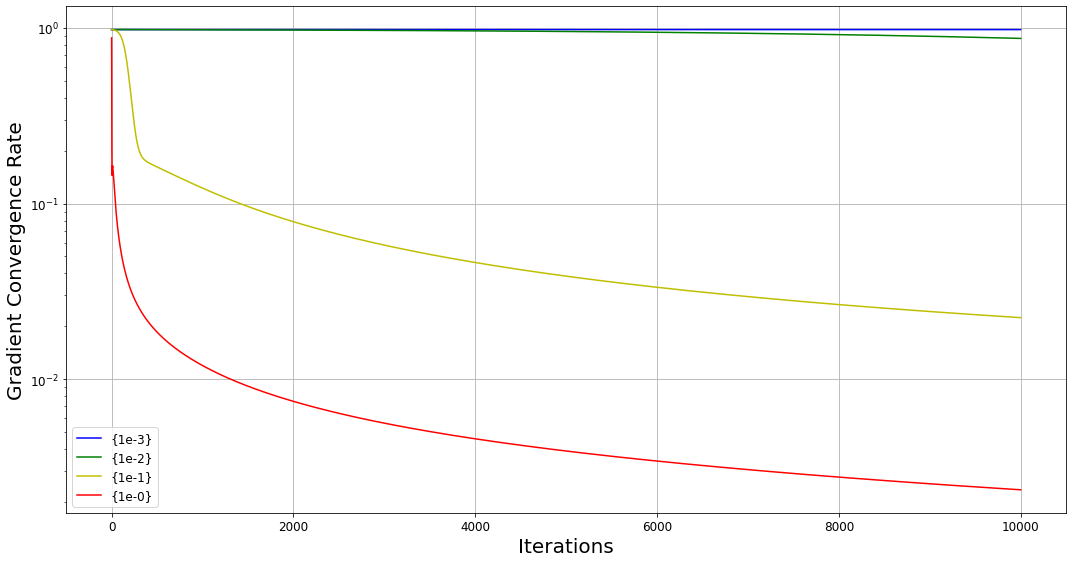

In [19]:
plt.figure(figsize=(15,8))
plt.xlabel(text_label_iterations, fontsize=20)
plt.ylabel(text_label_convergence_rate, fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.semilogy(convergence_history1, color='b', label='{1e-3}')
plt.semilogy(convergence_history2, color='g', label='{1e-2}')
plt.semilogy(convergence_history3, color='y', label='{1e-1}')
plt.semilogy(convergence_history4, color='r', label='{1e-0}')
plt.legend(loc="best", fontsize=12)

## results
SGD is more effective than GD (if we compare with 3_SGD_GDArmijo.ipynb), Momentum added a mechanism for aggregating a history of past gradients to accelerate convergence. Adam works better (converges faster with step size 1) than Nesterov Momentum and SGD, because it combines features of many optimization algorithms (Adagrad, RMSprop, SGD, Momentum) and it uses the exponetial weighted moving average to obtain the estimate of the momentum and the second momentum of the gradient, which gives better convergence.

(5 pts) Test different batch sizes and conclude the effect on gradient variance and convergence speed

In [20]:
batch_size = 64

In [21]:
def analitical_grad(x, s, w):
    return (sigmoid(w, x) - s).T @ x

In [22]:
def batch_gradients(x, s, w, batch_size):
    variance = 0
    for i in range(batch_size):
        variance += analitical_grad(np.array(x[i]), s[:x[i].size], w)
    variance = variance/batch_size
    return variance

Unfortunately, I got some dimensions problem in calculating different batch sizes.
The variance is equal to the gradient (see above). By applying the less size batches in calculations, it shall decrease the computation time and converge at almost the same point.

In [23]:
# Your solution is here

## Problem 2 

Consider the following optimization problem

$$
\min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
$$

- (2 pts) Compare convergence of gradient descent, non-linear conjugate gradient method from ```scipy.optimize``` package, heavy ball method and accelerated gradient method in solving this problem if the gradient norm is used as a measure of convergence 

- (4 pts) What procedure to select the step size gives the fastest convergence for every method? Consider any three strategies for every of the following method: gradient descent, heavy ball method and accelerated gradient method. For example, constant, decreasing sequence, some adaptive rule. In the latter case, think how you can adapt the Armijo rule (or similar rules) for heavy ball and accelerated gradient method.
- (2 pts) Consider different dimensions $m$ and $n$ ($m > n$ and $m < n$). Vectors $a_i$ and $b$ can be generated from the standard normal distribution.

Note that the stable way to compute the objective and gradient is crucial to solve this problem successfully, otherwise you will get NaN values in vector $x_k$ since the intermediate values for the sum of large exponent overflow the capacity of the ```double``` precision.

In [24]:
n, m = 1000, 100
np.random.seed(20)
eps = 1e-4

A = np.random.rand(n, m)
b = np.random.rand(n)
x0 = np.random.rand(m)
x = x0

In [25]:
import jax
import jax.numpy as jax_np

def cost_func(X):
    x = A @ X + b
    c = jax_np.max(x)
    return c + jax_np.log(jax_np.sum(jax_np.exp(x - c))) # logsumexp, applies for unstable gradient descent

f = jax.jit(cost_func)
grad_f = jax.jit(jax.grad(cost_func, argnums=0, has_aux=False))

In [26]:
import ipywidgets as ipywidg
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

alpha_opt=  0.0001473446928961116 beta_opt=  0.8545774811794983
Maximum iteration exceeds!
Convergence in 1000 iterations
Function value = 6.188107967376709
Norm of gradient = 4.9751763343811035
85.5 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


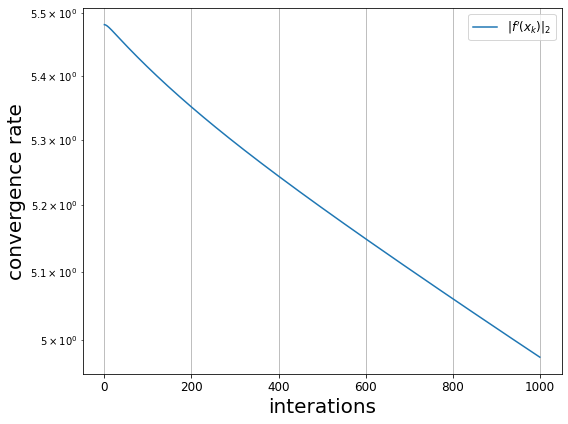

In [27]:
# heavy ball
import liboptpy.base_optimizer as base

mu = np.min(np.linalg.eigvals(A.T.dot(A)))
L =  np.max(np.linalg.eigvals(A.T.dot(A)))
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, (1 - np.sqrt(alpha_opt * mu))**2)
print('alpha_opt= ', alpha_opt, 'beta_opt= ', beta_opt)

class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

gd = HeavyBall(f, grad_f, ss.ConstantStepSize(alpha_opt), beta = beta_opt)
x = gd.solve(x0, tol=eps, max_iter=1000, disp=True)
%timeit gd.solve(x0, tol=eps, max_iter=1000)
x_conv = gd.get_convergence()


grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.xlabel("interations", fontsize=20)
plt.ylabel("convergence rate", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

Maximum iteration exceeds!
Convergence in 1000 iterations
Function value = -10.572853088378906
Norm of gradient = 4.7038140296936035
103 ms ± 7.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


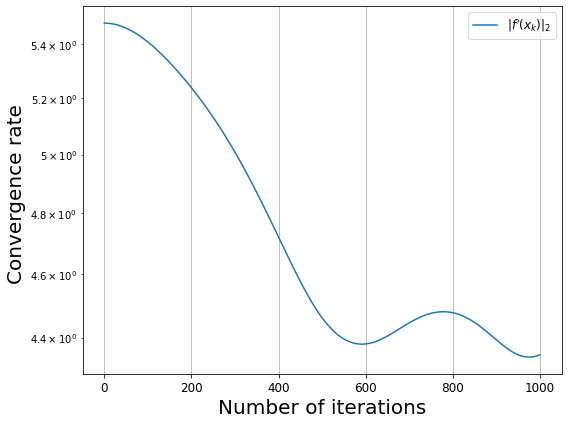

In [28]:
# Accelerated 

gd = methods.fo.AcceleratedGD(f, grad_f, ss.ConstantStepSize(2e-5))
x = gd.solve(x0, tol=eps, max_iter=1000, disp=True)
%timeit gd.solve(x0, tol=eps, max_iter=1000)

x_conv = gd.get_convergence()

grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]

plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("Convergence rate ", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

In [29]:
from scipy import optimize

In [30]:
res = optimize.fmin_cg(f, x0, fprime=grad_f) 

         Current function value: -139259632.000000
         Iterations: 4985
         Function evaluations: 553449
         Gradient evaluations: 553437


In [31]:
beta = 0.3
rho=0.99
init_alpha =1.

In [32]:
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho = rho, beta = beta, init_alpha = init_alpha))
%timeit gd.solve(x0, tol=eps, max_iter=1000)
x = gd.solve(x0, tol=eps, max_iter=1000, disp=True)

344 ms ± 7.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Maximum iteration exceeds!
Convergence in 1000 iterations
Function value = -18567.09375
Norm of gradient = 4.310732841491699


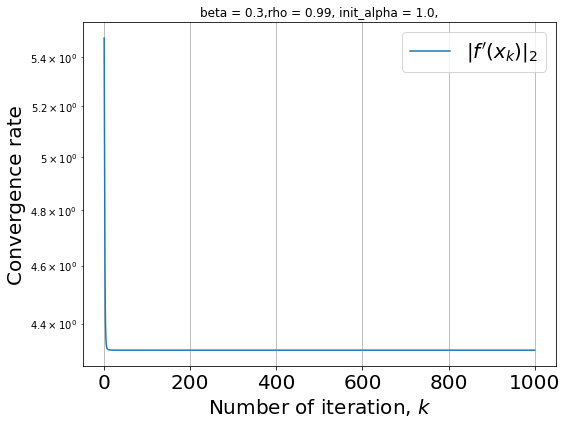

In [33]:
x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.title(f'beta = {beta},rho = {rho}, init_alpha = {init_alpha},')
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.grid(True)
plt.tight_layout()

Consider different dimensions m and  𝑛


In [34]:
n, m = 100, 1000
np.random.seed(20)
eps = 1e-4

A = np.random.rand(n, m)
b = np.random.rand(n)
x0 = np.random.rand(m)
x = x0

In [35]:
import jax
import jax.numpy as jax_np

def cost_func(X):
    x = A @ X + b
    c = jax_np.max(x)
    return c + jax_np.log(jax_np.sum(jax_np.exp(x - c)))

f = jax.jit(cost_func)
grad_f = jax.jit(jax.grad(cost_func, argnums=0, has_aux=False))

Maximum iteration exceeds!
Convergence in 1000 iterations
Function value = -167.8125
Norm of gradient = 15.617111206054688
91.5 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


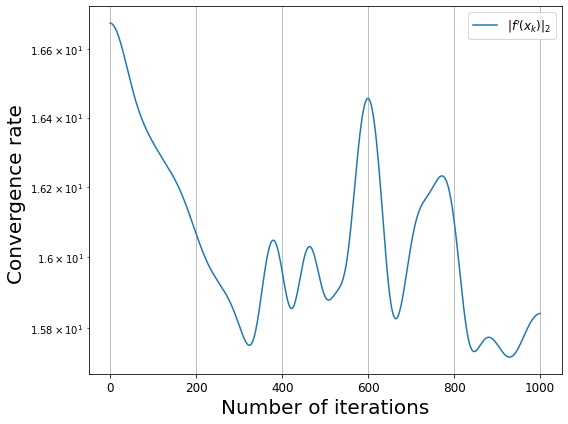

In [36]:
# Accelerated 

gd = methods.fo.AcceleratedGD(f, grad_f, ss.ConstantStepSize(2e-5))
x = gd.solve(x0, tol=eps, max_iter=1000, disp=True)
%timeit gd.solve(x0, tol=eps, max_iter=1000)

x_conv = gd.get_convergence()

grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]

plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("Convergence rate ", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

In [43]:
gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho = rho, beta = beta, init_alpha = init_alpha))
%timeit gd.solve(x0, tol=eps, max_iter=100)
x = gd.solve(x0, tol=eps, max_iter=100, disp=True)

33.6 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -23893.8671875
Norm of gradient = 17.232192993164062


In [44]:
beta = 0.3
rho=0.99
init_alpha =1.

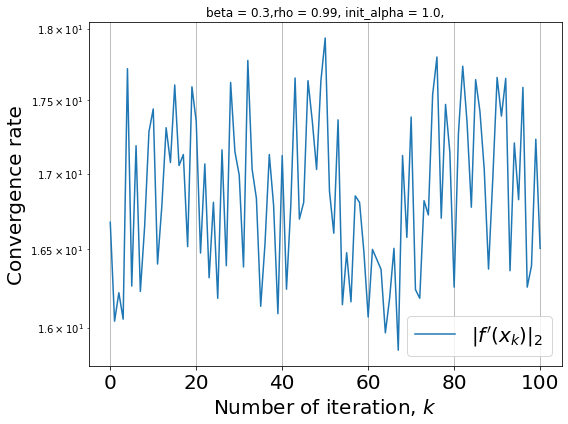

In [45]:
x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.title(f'beta = {beta},rho = {rho}, init_alpha = {init_alpha},')
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.grid(True)
plt.tight_layout()

n shall be > than m, otherwise we get bad convergence

In [4]:
from functools import reduce
def midD(array):
    return reduce(lambda a,b: a if (a<b) else b, array)

In [5]:
test = [1, 3, 7, -5]

In [6]:
midD(test)

-5